In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [4]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2020-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-02-24', tz='America/New_York').isoformat()

In [6]:
#TSLA Stock 

timeframe = '1Day'
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["TSLA"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
df_ticker

# Separate ticker data"
# YOUR CODE HERE!

TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

tsla_df = pd.concat([TSLA], axis=1, keys=["TSLA"])

# Display sample data
tsla_df.head()

TSLA                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-02-03 05:00:00+00:00  673.69  786.1400  673.5200  780.00  47316151   
2020-02-04 05:00:00+00:00  883.76  968.9899  833.8800  887.06  61049460   
2020-02-05 05:00:00+00:00  823.39  845.9800  704.1106  734.70  48453586   
2020-02-06 05:00:00+00:00  700.12  795.8300  687.0000  748.96  39881797   
2020-02-07 05:00:00+00:00  730.09  769.7500  730.0000  748.07  17132210   

                                                   
                          trade_count        vwap  
timestamp                                          
2020-02-03 05:00:00+00:00      837249  737.432873  
2020-02-04 05:00:00+00:00     1287721  904.706960  
2020-02-05 05:00:00+00:00     1033190  764.153427  
2020-02-06 05:00:00+00:00      804002  748.461750  
2020-02-07 05:00:00+00:00      329931  746.772772

In [7]:
tsla_df_close = tsla_df["TSLA"]["close"]
tsla_df_pct =tsla_df_close.pct_change()
tsla_df_pct.describe()

count    520.000000
mean       0.002498
std        0.057425
min       -0.774862
25%       -0.020583
50%        0.002133
75%        0.026004
max        0.196412
Name: close, dtype: float64

In [8]:
tsla_df_pct.describe().to_csv('tsla_pct_close.csv')

In [9]:
#tsla_pct = tsla_df_close.pct_change()
#tsla_pct.dropna(inplace=True)
tsla_df_close.describe()
tsla_df_close.describe().to_csv('tsla.csv')

In [10]:
tsla_count = pd.read_csv('tsla.csv')
tsla_count['Unnamed: 0'] 
tsla_count.set_index('Unnamed: 0')

,close
Unnamed: 0,
count,521.000000
mean,805.638168
std,310.767544
min,330.210000
25%,630.850000
50%,739.380000
75%,917.420000
max,2238.750000


In [11]:
#tsla_count_pct = tsla_count.pct_change()
#tsla_count_pct

In [12]:
Tweet_count = pd.read_csv('retweet_likes_count.csv')
Tweet_count['Unnamed: 0'] 
Tweet_count.set_index('Unnamed: 0')

,Retweets Count,Likes Count
Unnamed: 0,,
count,534.000000,534.000000
mean,5687.110487,55743.623596
std,14594.711569,107814.075833
min,73.000000,1350.000000
25%,445.500000,6727.000000
50%,862.000000,13469.000000
75%,3092.000000,51025.000000
max,107869.000000,865043.000000


In [13]:
retweet_count = pd.concat([Tweet_count, tsla_count], axis="columns", join="inner")
retweet_count

,Unnamed: 0,Retweets Count,Likes Count,Unnamed: 0,close
0,count,534.000000,534.000000,count,521.000000
1,mean,5687.110487,55743.623596,mean,805.638168
2,std,14594.711569,107814.075833,std,310.767544
3,min,73.000000,1350.000000,min,330.210000
4,25%,445.500000,6727.000000,25%,630.850000
5,50%,862.000000,13469.000000,50%,739.380000
6,75%,3092.000000,51025.000000,75%,917.420000
7,max,107869.000000,865043.000000,max,2238.750000


In [14]:
corr_returns = retweet_count.corr()
corr_returns

,Retweets Count,Likes Count,close
Retweets Count,1.000000,0.999374,0.914882
Likes Count,0.999374,1.000000,0.926381
close,0.914882,0.926381,1.000000


<AxesSubplot:>

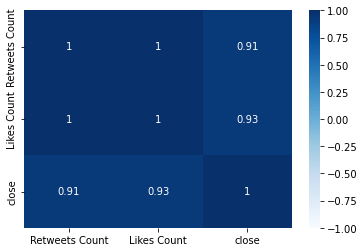

In [15]:
# Display de correlation matrix
sns.heatmap(corr_returns, vmin = -1, vmax = 1, annot=True, cmap="Blues")

In [17]:
Tweet_count_pct = pd.read_csv('retweet_likes_pct.csv')
Tweet_count_pct['Unnamed: 0'] 
Tweet_count_pct.set_index('Unnamed: 0')

,Retweets Count,Likes Count
Unnamed: 0,,
count,534.000000,534.000000
mean,10.690204,4.677541
std,41.047668,13.487012
min,-0.986081,-0.987638
25%,-0.511656,-0.594954
50%,0.879310,0.372892
75%,4.294118,2.717351
max,445.736842,152.784342


In [18]:
TSLA_pct = pd.read_csv('tsla_pct_close.csv')
TSLA_pct['Unnamed: 0'] 
TSLA_pct.set_index('Unnamed: 0')

,close
Unnamed: 0,
count,520.000000
mean,0.002498
std,0.057425
min,-0.774862
25%,-0.020583
50%,0.002133
75%,0.026004
max,0.196412


In [19]:
retweet_count_pct = pd.concat([Tweet_count_pct, TSLA_pct], axis="columns", join="inner")
retweet_count_pct

,Unnamed: 0,Retweets Count,Likes Count,Unnamed: 0,close
0,count,534.000000,534.000000,count,520.000000
1,mean,10.690204,4.677541,mean,0.002498
2,std,41.047668,13.487012,std,0.057425
3,min,-0.986081,-0.987638,min,-0.774862
4,25%,-0.511656,-0.594954,25%,-0.020583
5,50%,0.879310,0.372892,50%,0.002133
6,75%,4.294118,2.717351,75%,0.026004
7,max,445.736842,152.784342,max,0.196412


In [20]:
PCT_corr_returns = retweet_count.corr()
PCT_corr_returns

,Retweets Count,Likes Count,close
Retweets Count,1.000000,0.999374,0.914882
Likes Count,0.999374,1.000000,0.926381
close,0.914882,0.926381,1.000000


<AxesSubplot:>

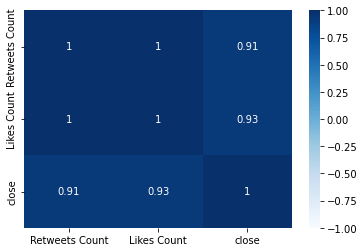

In [21]:
# Display de correlation matrix
sns.heatmap(PCT_corr_returns, vmin = -1, vmax = 1, annot=True, cmap="Blues")

In [24]:
# Set the ticker
elon_ticker = ["BTCUSD","ETHUSD", "DOGEUSD","KO","TSLA"]
# Set timeframe to "1Day"
timeframe = "1Day"
# Set start and end datetimes of 2 years from Today
start_date = pd.Timestamp("2018-02-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-05", tz="America/New_York").isoformat()
# historical data for crypto
elon_ticker_data = alpaca.get_bars(
    elon_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
elon_ticker_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-02-01 05:00:00+00:00,47.41,47.730,47.110,47.45,10273595,48793,47.409004,KO
2018-02-02 05:00:00+00:00,47.35,47.410,46.630,46.73,12912307,59450,46.904812,KO
2018-02-05 05:00:00+00:00,46.65,46.920,44.411,44.89,23261475,124038,45.555125,KO
2018-02-06 05:00:00+00:00,44.00,44.740,43.440,44.67,25184474,152316,44.226541,KO
2018-02-07 05:00:00+00:00,44.52,45.495,44.280,44.56,18041614,94128,44.909909,KO
